<a href="https://colab.research.google.com/github/mifm/examples/blob/master/wake_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install py_wake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.5 MB/s eta 0:00:00


In [2]:
import numpy as np

from py_wake.deficit_models.gaussian import BastankhahGaussian
from py_wake.utils.gradients import autograd
from py_wake.validation.lillgrund import wt_x, wt_y, LillgrundSite, ct_curve, power_curve
from py_wake.wind_turbines import WindTurbine
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular

wind_turbines = WindTurbine('SWT2p3_93_65', 92.6, 65, PowerCtTabular(ct_curve[:,0],power_curve[:,1], 'kW', ct_curve[:,1]))
site = LillgrundSite()
wf_model = BastankhahGaussian(site, wind_turbines)

print(wf_model(wt_x, wt_y).aep(with_wake_loss=False).values.sum())
print(wf_model.aep(wt_x, wt_y, with_wake_loss=False))
print(wf_model(wt_x, wt_y).aep(with_wake_loss=True).values.sum())
print(wf_model.aep(wt_x, wt_y, with_wake_loss=True))



46121.48947970182
960.8643641604544
36559.123720435055
36559.123720435055


In [5]:
sim_res = wf_model(wt_x, wt_y)

In [6]:
sim_res

<xarray.SimulationResult>
Dimensions:           (wt: 48, wd: 360, ws: 23)
Coordinates:
  * wd                (wd) int64 0 1 2 3 4 5 6 7 ... 353 354 355 356 357 358 359
  * ws                (ws) int64 3 4 5 6 7 8 9 10 11 ... 18 19 20 21 22 23 24 25
  * wt                (wt) int64 0 1 2 3 4 5 6 7 8 ... 40 41 42 43 44 45 46 47
    type              (wt) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Data variables: (12/17)
    WS_eff            (wt, wd, ws) float64 3.0 4.0 5.0 6.0 ... 23.0 24.0 25.0
    TI_eff            (wt, wd, ws) float64 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1
    Power             (wt, wd, ws) float64 0.0 6.5e+04 ... 2.3e+06 2.3e+06
    CT                (wt, wd, ws) float64 0.0 0.81 0.84 0.83 ... 0.06 0.05 0.05
    h                 (wt) int64 65 65 65 65 65 65 65 ... 65 65 65 65 65 65 65
    x                 (wt) float64 3.615e+05 3.612e+05 ... 3.591e+05 3.588e+05
    ...                ...
    ws_l              (ws) float64 2.5 3.5 4.5 5.5 6.5 ... 21.5 22.5 23.5 24.5
    ws_u              (ws) float64 3.5 4.5 5.5 6.5 7.5 ... 22.5 23.5 24.5 25.5
    Weibull_A         (wd) float64 9.42 9.42 9.42 9.42 ... 9.42 9.42 9.42 9.42
    Weibull_k         (wd) float64 2.41 2.41 2.41 2.41 ... 2.41 2.41 2.41 2.41
    Sector_frequency  (wd) float64 0.185 0.185 0.185 0.185 ... 0.185 0.185 0.185
    P                 (wd, ws) float64 0.008848 0.01244 ... 1.333e-05 5.297e-06

Nominal power as a function of wind speed (without wake loss)

In [15]:
power_without_wake_loss_k = wind_turbines.power(sim_res.ws.values) * len(wt_x)

In [16]:
power_with_wake_loss_lk = sim_res.Power.sum('wt').values

In [17]:
import matplotlib.pyplot as plt

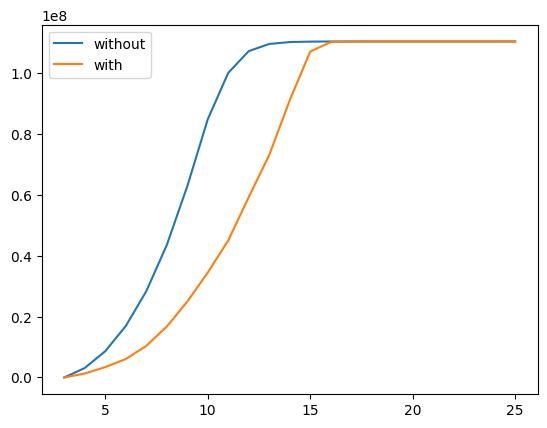

In [20]:
plt.plot(sim_res.ws.values, power_without_wake_loss_k, label='without')
plt.plot(sim_res.ws.values, power_with_wake_loss_lk[0,:], label='with')
plt.legend()